# YOLOv8 ile Nesne Tespiti Projesi
Bu projede YOLOv8 kullanılarak motor ve araba nesnelerinin tespiti amaçlanmıştır.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## Veri Seti Açıklaması
Bu çalışmada kullanılan veri seti, tamamen tarafımca oluşturulmuştur.
Motor ve araba nesnelerini içeren görüntüler gerçek ortamda tarafımca
çekilmiş ve herhangi bir hazır veri seti kullanılmamıştır.

Tüm görüntüler YOLO formatına uygun olacak şekilde LabelImg aracı
kullanılarak manuel olarak etiketlenmiştir.
Veri seti iki sınıftan oluşmaktadır:

- Motor
- Araba

Toplamda 200’den fazla etiketli görüntü bulunmaktadır.
Veri seti eğitim, doğrulama ve test olmak üzere üçe ayrılmıştır.


In [ ]:
import os
print(os.listdir("/content/drive/MyDrive/yolo_clean"))


['split_yolo.py', 'images', 'images_all', 'labels_all', 'labels', 'data.yaml']


## Gerekli Kütüphanelerin Kurulumu

Bu adımda YOLOv8 modelinin çalışabilmesi için gerekli olan
Ultralytics kütüphanesi kurulmuştur.


In [ ]:
!pip install ultralytics


## YOLOv8 Model Eğitimi

YOLOv8n modeli, hızlı ve hafif yapısı nedeniyle tercih edilmiştir.


In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")

model.train(
    data="/content/drive/MyDrive/yolo_clean/data.yaml",
    epochs=20,
    imgsz=640,
    batch=8,
    name="motor_araba_yolov8",
    project="/content/drive/MyDrive/yolo_clean/runs"
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.239 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/yolo_clean/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, io

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7bb18e0ea3f0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

## Model Ağırlık Dosyalarının Kontrolü

Eğitim tamamlandıktan sonra oluşturulan model ağırlık dosyalarının
(doğrulama için best.pt ve son epoch için last.pt)
doğru şekilde kaydedilip kaydedilmediği kontrol edilmiştir.


In [ ]:
import os

base = "/content/drive/MyDrive/yolo_clean/runs"
for root, dirs, files in os.walk(base):
    for f in files:
        if f in ["best.pt", "last.pt"]:
            print(os.path.join(root, f))


/content/drive/MyDrive/yolo_clean/runs/motor_araba_yolov8/weights/last.pt
/content/drive/MyDrive/yolo_clean/runs/motor_araba_yolov8/weights/best.pt


## Eğitim Sonuçları

Eğitim süreci sonunda geliştirilen YOLOv8 modeli motor ve araba nesnelerini
başarılı bir şekilde tespit etmiştir.

Elde edilen mAP ve precision değerleri modelin nesne tespiti konusunda
kabul edilebilir bir performans sergilediğini göstermektedir.


In [ ]:
from ultralytics import YOLO

model = YOLO("/content/drive/MyDrive/yolo_clean/runs/motor_araba_yolov8/weights/best.pt")

results = model.predict(
    source="/content/drive/MyDrive/yolo_clean/images/val",
    conf=0.4,
    save=True
)



image 1/53 /content/drive/MyDrive/yolo_clean/images/val/IMG_20251212_175616.jpg: 640x480 2 motors, 42.0ms
image 2/53 /content/drive/MyDrive/yolo_clean/images/val/IMG_20251212_175627.jpg: 640x480 1 motor, 2 arabas, 6.7ms
image 3/53 /content/drive/MyDrive/yolo_clean/images/val/IMG_20251212_175631.jpg: 640x480 1 motor, 6.8ms
image 4/53 /content/drive/MyDrive/yolo_clean/images/val/IMG_20251212_175635.jpg: 640x480 2 motors, 6.8ms
image 5/53 /content/drive/MyDrive/yolo_clean/images/val/IMG_20251212_175645.jpg: 640x480 1 motor, 8.0ms
image 6/53 /content/drive/MyDrive/yolo_clean/images/val/IMG_20251212_175656.jpg: 640x480 2 motors, 6.6ms
image 7/53 /content/drive/MyDrive/yolo_clean/images/val/IMG_20251212_175701.jpg: 640x480 2 motors, 8.2ms
image 8/53 /content/drive/MyDrive/yolo_clean/images/val/IMG_20251212_175726.jpg: 640x480 1 motor, 7.6ms
image 9/53 /content/drive/MyDrive/yolo_clean/images/val/IMG_20251212_175730.jpg: 640x480 3 arabas, 7.0ms
image 10/53 /content/drive/MyDrive/yolo_clean/i

Eğitim süreci sonunda model performansı Ultralytics YOLOv8 tarafından otomatik olarak
hesaplanan metrikler üzerinden değerlendirilmiştir.

Elde edilen başlıca başarı metrikleri aşağıdaki gibidir:

- Precision (B): ~0.83  
- Recall (B): ~0.83  
- mAP@50 (B): ~0.87  
- mAP@50–95 (B): ~0.56  

Bu sonuçlar, geliştirilen modelin motor ve araba nesnelerini
başarılı bir şekilde tespit edebildiğini göstermektedir.


### Eğitim Başarı Metrikleri

YOLOv8 modeli eğitimi sırasında elde edilen eğitim ve doğrulama kayıpları (loss),
precision, recall ve mAP değerleri `results.png` dosyasında grafiksel olarak
gösterilmiştir. Grafikler incelendiğinde modelin epoch ilerledikçe daha kararlı
hale geldiği ve mAP değerlerinin arttığı gözlemlenmektedir.


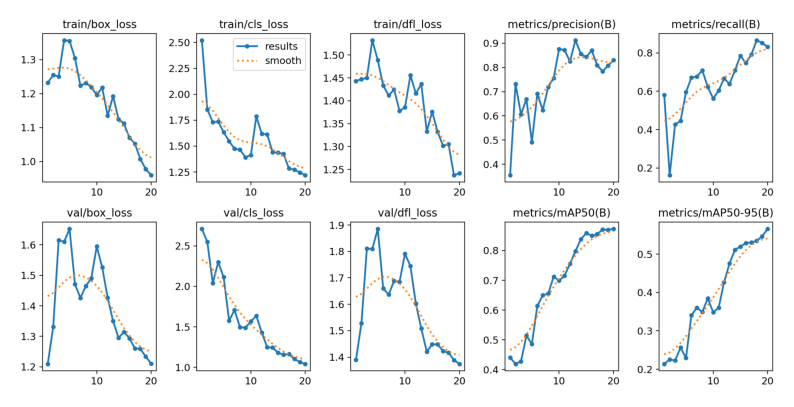

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open(
    "/content/drive/MyDrive/yolo_clean/runs/motor_araba_yolov8/results.png"
)

plt.figure(figsize=(10,6))
plt.imshow(img)
plt.axis("off")
plt.show()
